In [1]:
import matplotlib.colors as mc
import random as rdm
import numpy as np

In [2]:
from pyquantum.core.visualization import BlochSphere
from pyquantum.core.qubit import Qubit
from pyquantum.core.gate import *

# 1 - Représentation d'un Qubit

Dans un premier temps, on définit un Qubit $\psi$ dont les coordonnées angulaires dans la sphère de Bloch sont 0 et 0. Par défaut, on le représente textuellement par ses deux coordonnées dans la base vectorielle orthonormée canonique $|0\rangle$ et $|1\rangle$.

In [3]:
PSI = Qubit(theta=0, phi=0, name='Psi')
PSI

+1.00|0>  +0.00+0.00j|1>

On peut ensuite accéder à ses coordonnées angulaires $\theta$ et $\phi$, ses probabilitées et son dual (qui n'est pas un Qubit à proprement parlé et en cela, représenté par un vecteur ligne).

In [22]:
print(PSI.angles)
print(PSI.probabilities)
print(PSI.dual)

θ: 0, φ: 0
(1.0, 0.0)
[[1.-0.j 0.-0.j]]


Il est naturellement possible d'afficher ce Qubit $\psi$ sur la sphère de Bloch avec pour convention $|0\rangle$ en haut et $|1\rangle$ en bas. On comprend visuellement pourquoi les probabilités sont aussi déséquilibrées : le Qubit pointe vers le haut.

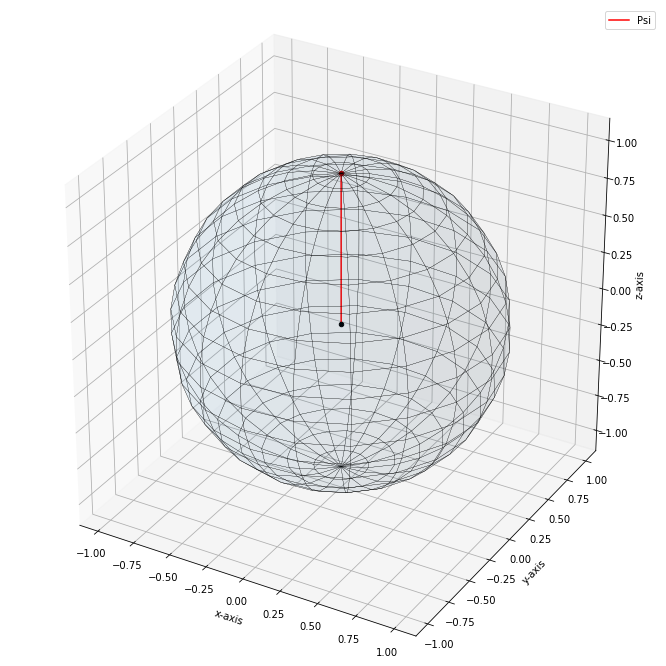

In [7]:
sphere1 = BlochSphere(figsize=(12, 12))
sphere1.add_qubit(PSI, color='red')
sphere1.show()

On peut maintenant ajouter un second Qubit noté $\chi$, dont l'angle $\theta$ est légèrement différent (il est à 45° de $\psi$). On vérifie bien que ses probabilités évoluent correctement.

(0.8535533905932737, 0.14644660940672624)


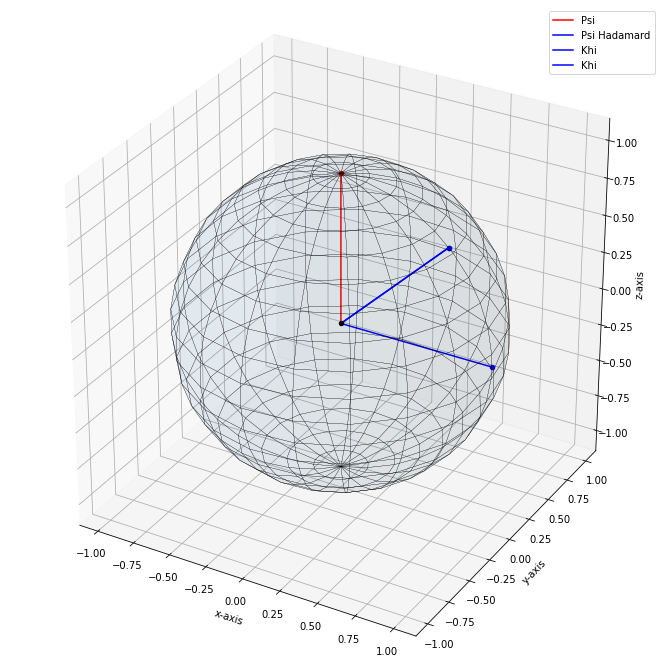

In [24]:
KHI = Qubit(theta=np.pi / 4, phi=0, name='Khi')
print(KHI.probabilities)
sphere1.add_qubit(KHI, color='blue')
sphere1.show()

Enfin, on ajoute à `sphere1` un dernier Qubit $\rho$ qui est tourné de 180° par rapport à $\chi$.

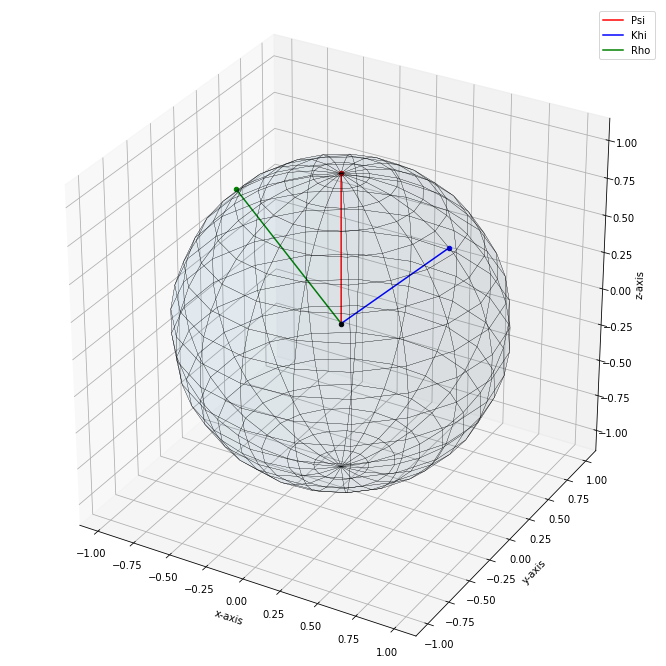

In [9]:
RHO = Qubit(theta=np.pi / 4, phi=np.pi, name='Rho')
sphere1.add_qubit(RHO, color='green')
sphere1.show()

# 2 - Introduction des portes

On définit maintenant la classe `Gate` qui permet la construction de portes quantiques, associées à leur représentation matricielle. Par exemple, on a ici la porte $X$ ou $\sigma_x$, la première porte de Pauli.

In [26]:
X.matrix

matrix([[0, 1],
        [1, 0]])

On a également la matrice d'Hadamard, notée $H$, qui sera très utile dans la construction du circuit de transformation de Fourier.

In [11]:
H.matrix

matrix([[ 0.70710678,  0.70710678],
        [ 0.70710678, -0.70710678]])

Enfin, la matrice $T$, également appelée porte $\pi/8$ en raison de la rotation qu'elle ajoute aux Qubits. C'est un cas particulier de la porte de rotation notée $R_m$ qu'on définira par la suite.

In [12]:
T.matrix

matrix([[1.     +0.j     , 0.     +0.j     ],
        [0.     +0.j     , 0.70711+0.70711j]])

On peut utiliser chaque porte pour appliquer une transformation à un Qubit. Pour exemple, voyons comment la porte de Hadamard affecte notre Qubit primaire $\psi$. On note $\psi_H$ le nouveau Qubit.

In [13]:
PSI_H = PSI.apply(H, name='Psi Hadamard')

Dans ce cas, on observe que le Qubit subit une rotation de 90° selon sa coordonnée angulaire $\theta$.

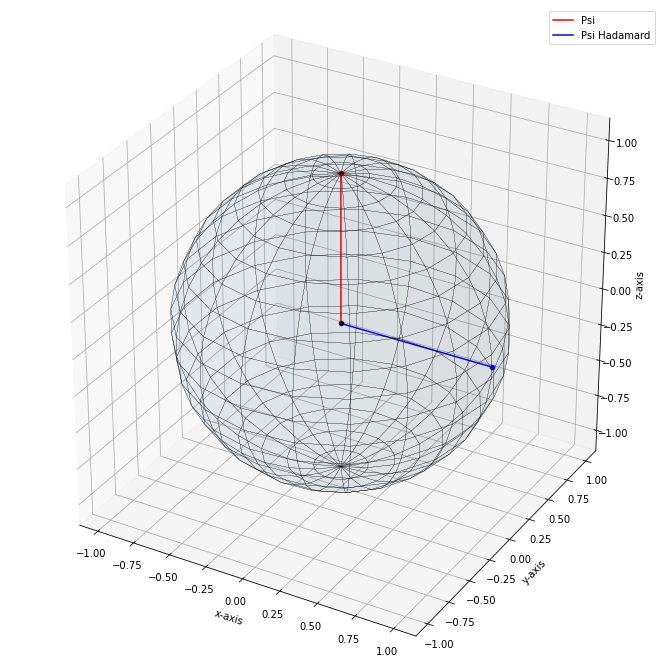

In [14]:
sphere1 = BlochSphere(figsize=(12, 12))
sphere1.add_qubit(PSI, color='red')
sphere1.add_qubit(PSI_H, color='blue')
sphere1.show()

# 3 - Visualisation de pseudo-circuits

On peut maintenant commencer à construire des circuits élémentaires en appliquant différentes portes à un Qubit. Ici, la fonction `random_xyz` applique les trois portes de Pauli séparément à un Qubit aléatoire et affiche les quatre Qubits résultants sur la sphère de Bloch.

In [15]:
def random_xyz(figsize=(12, 12), set_seed=None):
    rdm.seed(set_seed) if set_seed else None
    theta = rdm.uniform(0, np.pi)
    phi = rdm.uniform(0, 2 * np.pi)
    psi = Qubit(theta=theta, phi=phi, name='Psi')
    x = psi.apply(X, name='X Observer')
    y = psi.apply(Y, name='Y Observer')
    z = psi.apply(Z, name='Z Observer')
    sphere = BlochSphere(figsize)
    sphere.add_qubit(psi, color='red')
    sphere.add_qubit(x, color='green')
    sphere.add_qubit(y, color='blue')
    sphere.add_qubit(z, color='yellow')
    sphere.show()

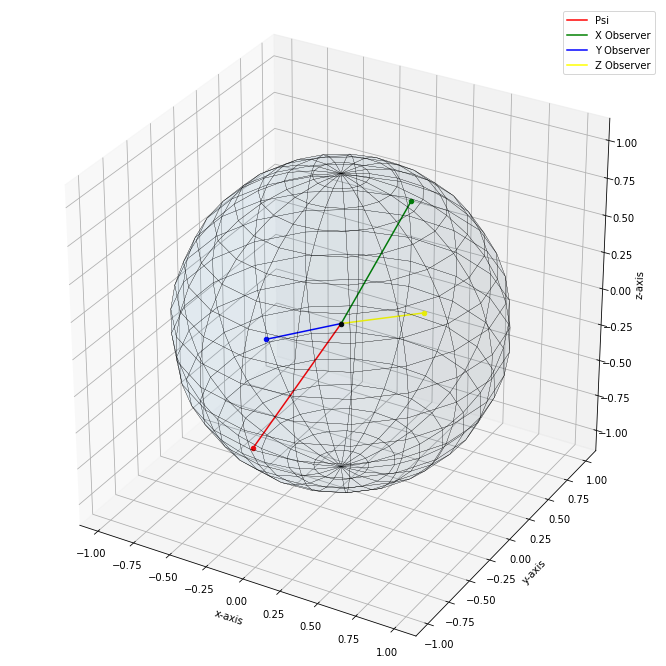

In [16]:
random_xyz(set_seed=5)

De manière similaire, la fonction `random_gates` applique trois portes classiques à un Qubit.

In [17]:
def random_gates(figsize=(12, 12), set_seed=None):
    rdm.seed(set_seed) if set_seed else None
    theta = rdm.uniform(0, np.pi)
    phi = rdm.uniform(0, 2 * np.pi)
    psi = Qubit(theta=theta, phi=phi, name='Psi')
    h = psi.apply(H, name='Hadamard')
    p = psi.apply(P, name='Pi/4')
    t = psi.apply(T, name='Pi/8')
    sphere = BlochSphere(figsize)
    sphere.add_qubit(psi, color='red')
    sphere.add_qubit(h, color='blue')
    sphere.add_qubit(p, color='green')
    sphere.add_qubit(t, color='yellow')
    sphere.show()

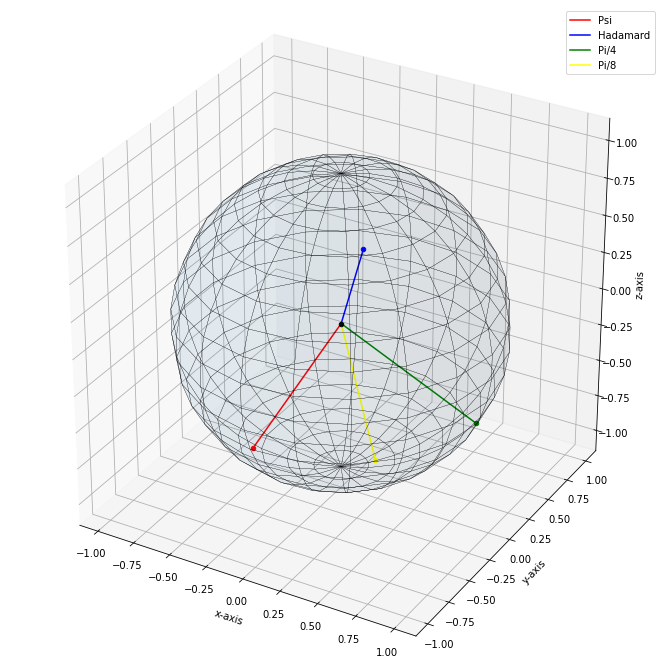

In [18]:
random_gates(set_seed=5)

Il peut être intéressant d'appliquer successivement la même porte à un Qubit pour observer son évolution. C'est ce que simule la fonction `successive`.

In [19]:
def successive(gate, iterations: int = 1, figsize=(12, 12), set_seed=None):
    rdm.seed(set_seed) if set_seed else None
    theta = rdm.uniform(0, np.pi)
    phi = rdm.uniform(0, 2 * np.pi)
    psi = Qubit(theta=theta, phi=phi, name='Psi')
    sphere = BlochSphere(figsize)
    qubit = psi
    for k in range(iterations + 1):
        sphere.add_qubit(qubit, color=list(mc.TABLEAU_COLORS.values())[k % 10])
        qubit = qubit.apply(gate, name=f'Iteration n°{k + 1}')
    sphere.show()

Avec la porte $X$ et pour trois itérations, on n'observe que deux Qubits visibles sur la sphère. C'est tout à fait normal car la porte $X$ est unitaire. On a donc : $X \cdot X^\dag = I$. Or $X$ est également réelle et symétrique, d'où $X^2 = I$. On comprend donc qu'en appliquant deux fois de suite la porte $X$ à un Qubit, on retrouve bien ce dernier.

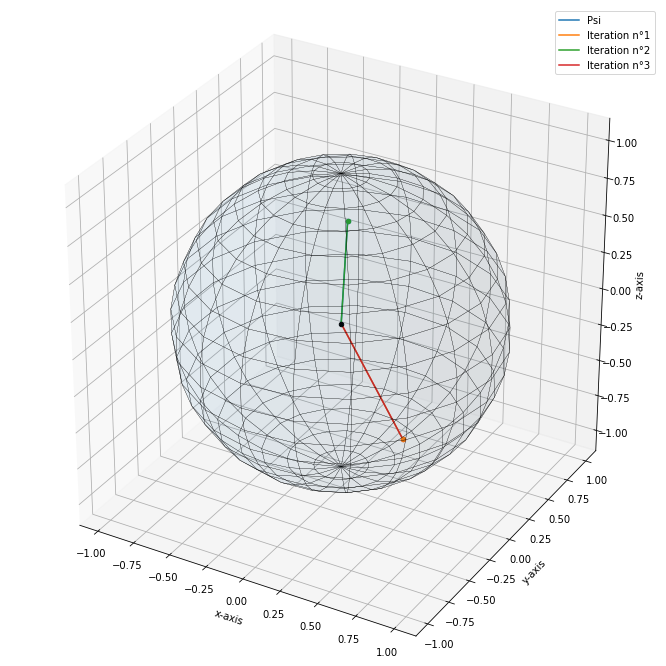

In [27]:
successive(gate=X, iterations=3, set_seed=1)

On peut également utiliser cette fonction pour observer les rotations successives d'un Qubit par le biais de la porte $T = R_3$.

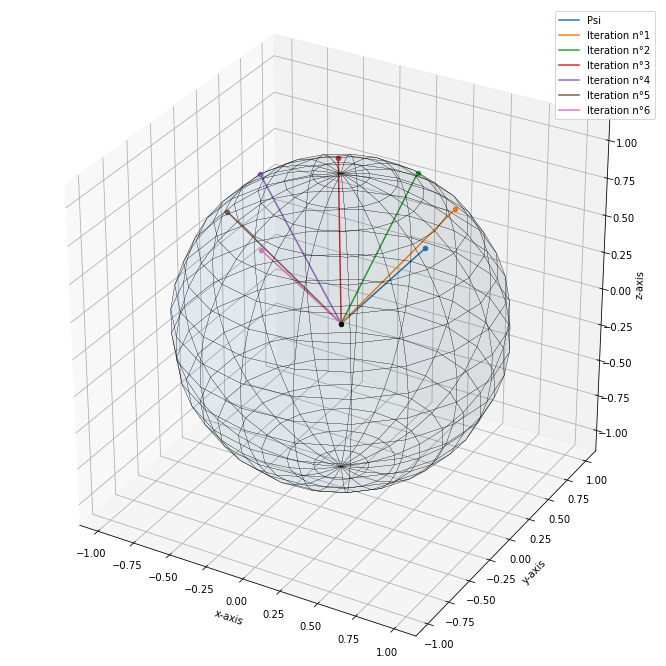

In [21]:
successive(gate=T, iterations=6, set_seed=8)

On a maintenant tous les outils de fond nécessaires à la manipulation de Qubits. La prochaine étape est de les mettre en relation pour construire des circuits cohérents.